# WaveWriter

> General arbitrary stimulation waveforms for electrical neuromodulation

In [ ]:
#|hide
%load_ext autoreload
%autoreload 2

In [ ]:
#|hide
import wavewriter
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#|hide
sns.set()
sns.set_context('talk')
sns.set_style('ticks')

The SyncMaster provides a simple way to synchronise behavioural tasks with recorded signals.

The device is connected to the computer running the task via USB and the output port is connected to an input on the recording system. The task script can then send commands to the device, producing event-specific signals on the output channel which can be used to time-lock recorded signals to behavioural events.

## Installation

The drivers to run the device using Python can be installed using pip:

```sh
pip install syncmaster
```

Further details are given in the `installation` section.

Once the Python package is installed and the device connected as outlined in the `setup` section, the device can be initialised and triggered to synchronise behavioural events with recorded signals. A simple application is shown below, with further details available in the `initialisation` and `triggering` sections.

## Example application

After importing the library, the device must be initialised. This should be done once at the beginning of the behavioural task.

Triggers can then be sent using simple commands. These can be integrated with the behavioural task in order to indicate the occurence of events of interest. This generates signals on the output channel which are recorded and can be used to analyse recorded data relative to behavioural events.

In [ ]:
#|eval: false
# Import library
#import syncmaster

# Create device object
#device = syncmaster.SyncMaster()

# Run trial with start and end signals
#device.start()    # Send start signal

''' Run behavioural task '''

#device.end()      # Send end signal

# Close communication channel when finished
#device.close()

On completion of the task, the communication channel with the device should be formally closed.

Note that more complex task designs with up to 100 user-defined event types can be accommodated. This is outlined in detail in the `triggering` section.

## Output
The device produced pulses of differing lengths on a single output channel. Each pulse length corresponds to a specific event type.

The package includes a function for recovering the discrete event timings from this single-channel pulse data in order to facilitate data analysis. A simple example is shown below with raw recorded data above and each subsequent row showing recovered trigger timings for each event type. This is described in further detail in the `analysis` section.

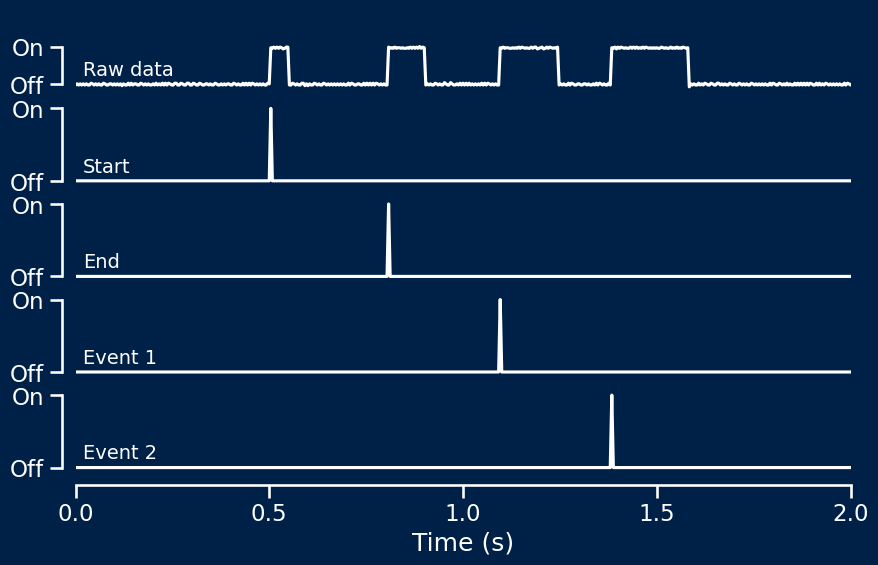

In [ ]:
#|echo:false
#|classes: dark-mode
'''
bg_colour = '#002147'
line_colour = '#fff'

# Load data
data = np.loadtxt('./example_data/all_triggers.csv', delimiter=',', skiprows=2, usecols=[0,1])

t = data[:, 0]
v = data[:, 1]

t = t + 0.5

# Get events
events = syncmaster.getEvents(v, 250)

# Plot results
fig, ax = plt.subplots(5, 1, sharex='row', figsize=(10,6))

ax[0].plot(t, v, color=line_colour)
ax[1].plot(t, events[0,:], color=line_colour)
ax[2].plot(t, events[1,:], color=line_colour)
ax[3].plot(t, events[2,:], color=line_colour)
ax[4].plot(t, events[3,:], color=line_colour)

labels = ['Raw data', 'Start', 'End', 'Event 1', 'Event 2']  #|hide_line

for idx, ax_ in enumerate(ax):
    sns.despine(ax=ax_, offset=10, trim=True)
    
    ax_.set(
        yticks = (0, 1),
        yticklabels = ['Off', 'On'],
        xlim = (0, 2)
    )
    
    ax_.text( #|hide_line
        0.02, 0.2, #|hide_line
        f"{labels[idx]}", #|hide_line
        ha='left', #|hide_line
        va='center', #|hide_line
        fontsize=14, #|hide_line
        color=line_colour #|hide_line
    ) #|hide_line
    
for ax_ in ax[:-1]:
    ax_.get_xaxis().set_visible(False)
    ax_.spines['bottom'].set_visible(False)
    
ax[-1].set(
    xlabel = 'Time (s)',
)

ax[0].set(
    yticks = (0, np.max(v)),
    yticklabels = ['Off', 'On']
)

sns.despine(ax=ax[0], offset=10, trim=True)
ax[0].get_xaxis().set_visible(False)
ax[0].spines['bottom'].set_visible(False)

for ax_ in ax:
    ax_.xaxis.label.set_color(line_colour)
    ax_.yaxis.label.set_color(line_colour)
    
    ax_.tick_params(axis='x', colors=line_colour)
    ax_.tick_params(axis='y', colors=line_colour)
    
    ax_.spines['left'].set_color(line_colour)
    ax_.spines['bottom'].set_color(line_colour)
    
    ax_.set_facecolor(bg_colour)
fig.patch.set_facecolor(bg_colour)
'''

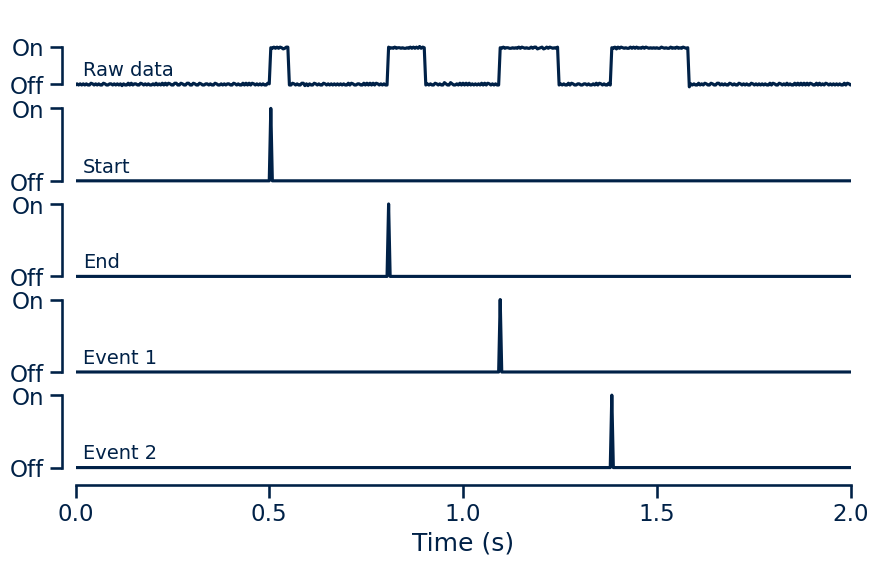

In [ ]:
#|echo:false
#|classes: light-mode
'''
bg_colour = '#fff'
line_colour = '#002147'

# Load data
data = np.loadtxt('./example_data/all_triggers.csv', delimiter=',', skiprows=2, usecols=[0,1])

t = data[:, 0]
v = data[:, 1]

t = t + 0.5

# Get events
events = syncmaster.getEvents(v, 250)

# Plot results
fig, ax = plt.subplots(5, 1, sharex='row', figsize=(10,6))

ax[0].plot(t, v, color=line_colour)
ax[1].plot(t, events[0,:], color=line_colour)
ax[2].plot(t, events[1,:], color=line_colour)
ax[3].plot(t, events[2,:], color=line_colour)
ax[4].plot(t, events[3,:], color=line_colour)

labels = ['Raw data', 'Start', 'End', 'Event 1', 'Event 2']  #|hide_line

for idx, ax_ in enumerate(ax):
    sns.despine(ax=ax_, offset=10, trim=True)
    
    ax_.set(
        yticks = (0, 1),
        yticklabels = ['Off', 'On'],
        xlim = (0, 2)
    )
    
    ax_.text( #|hide_line
        0.02, 0.2, #|hide_line
        f"{labels[idx]}", #|hide_line
        ha='left', #|hide_line
        va='center', #|hide_line
        fontsize=14, #|hide_line
        color=line_colour #|hide_line
    ) #|hide_line
    
for ax_ in ax[:-1]:
    ax_.get_xaxis().set_visible(False)
    ax_.spines['bottom'].set_visible(False)
    
ax[-1].set(
    xlabel = 'Time (s)',
)

ax[0].set(
    yticks = (0, np.max(v)),
    yticklabels = ['Off', 'On']
)

sns.despine(ax=ax[0], offset=10, trim=True)
ax[0].get_xaxis().set_visible(False)
ax[0].spines['bottom'].set_visible(False)

for ax_ in ax:
    ax_.xaxis.label.set_color(line_colour)
    ax_.yaxis.label.set_color(line_colour)
    
    ax_.tick_params(axis='x', colors=line_colour)
    ax_.tick_params(axis='y', colors=line_colour)
    
    ax_.spines['left'].set_color(line_colour)
    ax_.spines['bottom'].set_color(line_colour)
    
    ax_.set_facecolor(bg_colour)
fig.patch.set_facecolor(bg_colour)
'''

This approach can also be used to recover precise event timings for user-defined events. This is outlined in detail in the `analysis` section.

::: {.dark-mode}
![Oxford Neural Interfacing 2023](oni.png)
:::

::: {.light-mode}
![Oxford Neural Interfacing 2023](oni_blue.png)
:::